<a href="https://colab.research.google.com/github/arssite/Ghackk-Technologies/blob/main/Task2_sentiment_analysis_on_user_comments.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Task 2
The objective of this task was to create a Python function that fetches user comments and reviews from a specified URL, parses the HTML content, and saves the extracted comments into a file named comments.txt. The solution needed to implement file handling in append mode to ensure that new comments could be added without overwriting existing ones. Additionally, the implementation aimed to demonstrate the use of web scraping techniques using the requests and BeautifulSoup libraries.

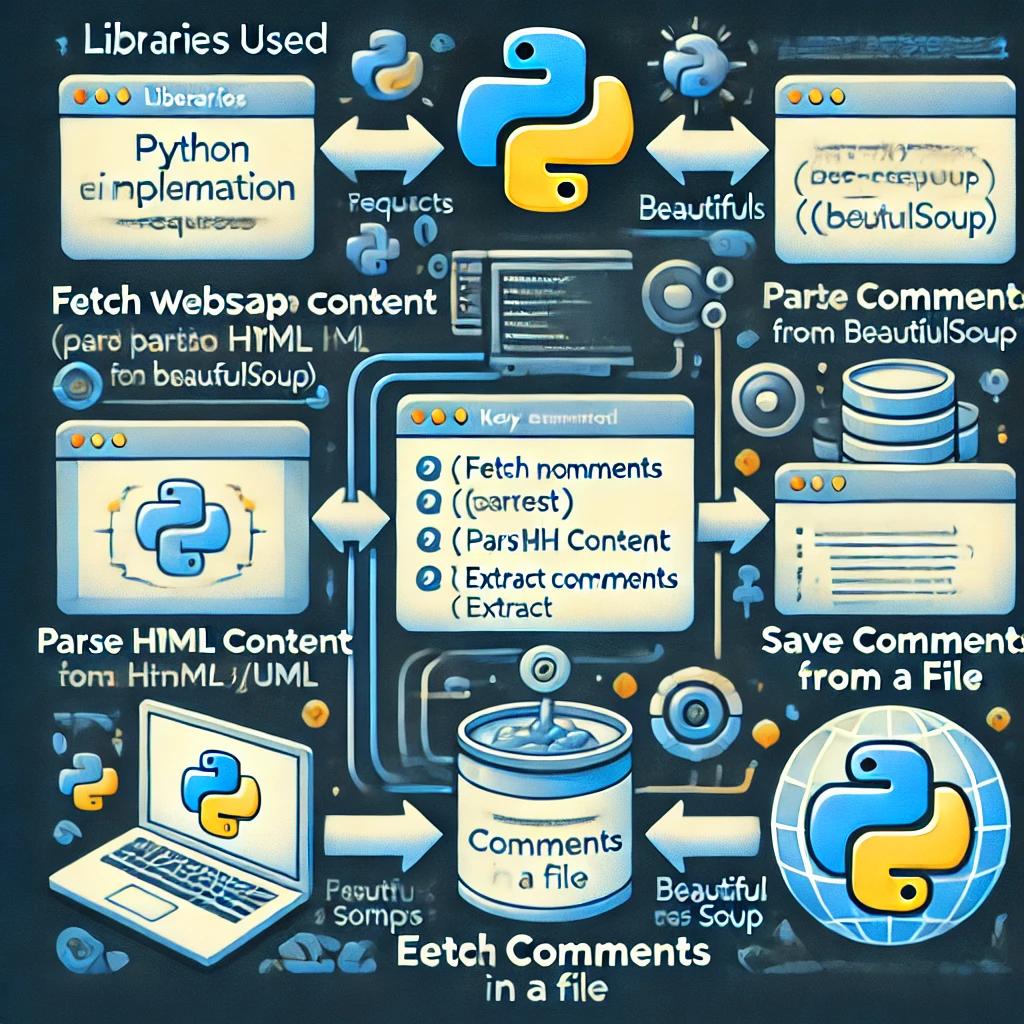

In [6]:
from textblob import TextBlob
import matplotlib.pyplot as plt
import requests
from bs4 import BeautifulSoup

In [8]:
def fetch_comments(url):
    try:
        response = requests.get(url)
        response.raise_for_status()
        soup = BeautifulSoup(response.text, 'html.parser')
        comments = soup.find_all('p', class_='comment')
        extracted_comments = [comment.get_text(strip=True) for comment in comments]
        with open('comments.txt', 'a') as file:
            for comment in extracted_comments:
                file.write(comment + '\n')
        print(f"Fetched and saved {len(extracted_comments)} comments to 'comments.txt'.")
    except requests.exceptions.RequestException as e:
        print(f"Error fetching comments: {e}")

In [9]:
url = 'https://animemangatoon.com/difference-between-manga-and-manhwa-webtoon'
fetch_comments(url)
#this url has 0 comments

Fetched and saved 0 comments to 'comments.txt'.


In [11]:
#taking sample comments
comments = [
    "I love manga! It's the best form of entertainment.",
    "Manhwa has such beautiful art styles.",
    "Manga can be really boring sometimes.",
    "I enjoy both equally.",
    "The stories in manhwa are often better than manga.",
    "I prefer manga, but manhwa is okay too.",
    "Manhwa is just a copy of manga.",
    "Manga has a unique charm that manhwa lacks.",
    "I don't like either of them.",
    "Manga and manhwa are both great!"
]
with open('comments.txt', 'a') as file:
    for comment in comments:
        file.write(comment + '\n')

In [12]:
with open('comments.txt', 'r') as file:
    comments = file.readlines()

In [13]:
comments = [comment.strip() for comment in comments]

In [15]:
positive_comments = 0
negative_comments = 0
for comment in comments:
    analysis = TextBlob(comment)
    if analysis.sentiment.polarity > 0:
        positive_comments += 1
    elif analysis.sentiment.polarity < 0:
        negative_comments += 1

In [14]:
total_comments = len(comments)
positive_percentage = (positive_comments / total_comments) * 100
negative_percentage = (negative_comments / total_comments) * 100

Percentage of Positive Comments: 35.00%
Percentage of Negative Comments: 5.00%


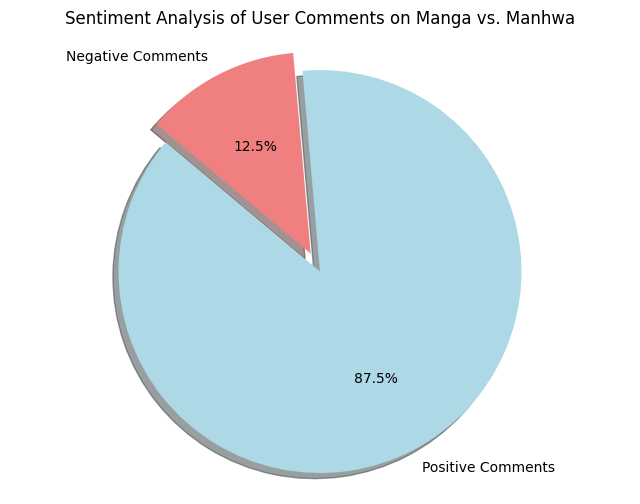

In [16]:
print(f"Percentage of Positive Comments: {positive_percentage:.2f}%")
print(f"Percentage of Negative Comments: {negative_percentage:.2f}%")
labels = ['Positive Comments', 'Negative Comments']
sizes = [positive_comments, negative_comments]
colors = ['lightblue', 'lightcoral']
explode = (0.1, 0)  # explode 1st slice
plt.figure(figsize=(8, 6))
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=140)
plt.axis('equal')
plt.title('Sentiment Analysis of User Comments on Manga vs. Manhwa')
plt.show()